# AMAT 502: Modern Computing for Mathematicians
## Lecture 19 - Model Validation and the Bias-Variance Tradeoff
### University at Albany SUNY

# Topics for Today

- Recommended Reading from Vanderplas
- Recap of the Data Science Pipeline
- Model Validation
    - Physics versus Data Science
    - Under and Overfitting Data
    - $R^2$---The Coefficient of Determination
    - The Bias-Variance Tradeoff
- Case Study in Polynomial Regression
- Case Study in KNN and the Iris Data Set
    - k-Fold Cross Validation

## Recommended Reading: VanderPlas

I recommend that everyone read Jake VanderPlas's [Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook) especially, Chapter 5 on Machine learning. Chaper 4 contains lots of instructions on plotting that will be useful for your final projects. Today's lecture will mostly follow [Secton 5.03 on Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html).

I *highly* recommend that everyone read VanderPlas's [Introduction to Scikit-learn](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) so that you have a more formal understanding of the Scikit-Learn API (API=Application Programming Interface). We'll go through a salient portion of that section to start. 


## The Scikit-Learn Data Science Pipeline

1. **Choose a class of model**
2. **Instantiate this class**
3. **Shape your data into a features matrix and target vector**. For example, `X` is a matrix (Pandas dataFrame) with `m_samples` rows and `n_features` columns. The target vector `y` is just a length `m_samples` array/column vector.
4. **Fit the model to your data** by calling the `fit()` method of the model instance, e.g. call `model.fit(X,y)`
5. **Apply the model to new/reserved data**:
    - For supervised learning, often we predict labels for unknown data using the `predict()` method, e.g. `xfit = np.linspace(-1, 11)`  and then `yfit = model.predict(Xfit)`
    - For unsupervised learning, we often transform or infer properties of the data using the `transform()` or `predict()` method.

### Quick Recall Question 

- **Give 2 examples of a supervised learning and 2 examples of an unsupervised learning method.**

- **Did they use the `predict()` or the `transform()` method respectively?**


## Simple Linear Regression Example

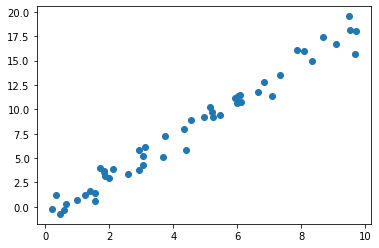

In [2]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

### Step 1: Choose a class of model by importing the appropriate estimator class from Scikit-Learn

In [3]:
from sklearn.linear_model import LinearRegression

### Step 2: Choose model hyperparameters by instantiating this class with desired attributes

In [4]:
# here we create an instance of the class LinearRegression (think back to OOP)
model = LinearRegression(fit_intercept=True)

### Step 3: Arrange data into a features matrix and target vector

In [7]:
X = x[:, np.newaxis]
X.shape
#x.shape

(50, 1)

### Step 4: Fit the model to the data

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
model.coef_

array([1.9776566])

In [10]:
model.intercept_

-0.9033107255311164

### Comment on Underscore Notation

See [this article](https://dbader.org/blog/meaning-of-underscores-in-python) on the different ways the `_` notation is used in Python.

I extracted this summary from the above article:

![Underscore Summary](underscore_summary.png)


### Step 5: Make Predictions

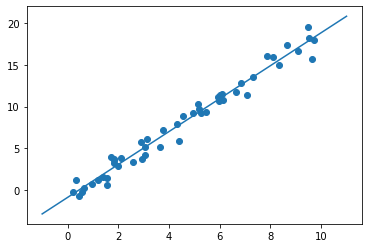

In [13]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Model Validation: Physics versus Data Science

### Key Question: Causation vs. Correlation

**How do we know when a chosen model is a good (correct) one?**

I propose two possible answers.

1. If there is an underlying **causal explanation** that when modeled mathematically produces the choice of model, then we are likely to believe in the model.
2. Alternatively, if we can come up with a model that **fits the data** better than any other model, then we are likely to believe in the model.

Notice that **Reason 1** described above lies within the tradition of physics. One uses basic physical laws to model a problem and solving the appropriate equations (Newton's equations, Schrödinger's wave equations, et al) gives the specifically chosen model. However **Reason 1** is totally useless in most data science applications today, such as this one: 

> In predictive political science, one might want to know how living in a rural or urban area predicts ones choice of presidential candidate. 

**Is it the case that one can write down physical laws that causally determine one's voting preference?** 

The answer to the above question is clearly **NO.** This would contradict the widely held belief of *free will.*
Nevertheless, it has [been observed empirically](https://www.pewsocialtrends.org/2018/05/22/urban-suburban-and-rural-residents-views-on-key-social-and-political-issues/) that where you live does have a strong correlation with political preference. 

Consequently, there are areas where non-causal models are the best we can hope for, such as K-nearest neighbors (KNN).

**Question:** Do you think KNN is actually a non-causal model?

## Under and Over Fitting Data

### A Word of Caution

Of course just fitting the data without some broader principles or heuristics is not wise either.

For example, we know by [Lagrange's Interpolation Formula](https://en.wikipedia.org/wiki/Lagrange_polynomial#targetText=In%20numerical%20analysis%2C%20Lagrange%20polynomials,functions%20coincide%20at%20each%20point) that we can find a polynomial that passes through every point in our *training* data set. This is the canonical example of **over-fitting** that I gave in my first lecture on regression.

**Question:** What are the approximate degrees of each of these polynomials?

<center>
    <img src="bias-variance.png" alt="The Bias Variance Tradeoff" width="1000" height="800">
</center>

## Testing the Quality of the Model

Recall that we can either **split the data** into training and test samples `X_train` and `X_test` or we can just generate new samples and predict their targets using the training model. Usually we do the former.

Luckily, just because an over-fitted model can (near) perfectly predict the targets values of the training data set, that doesn't mean it will do well on the test data set. Consequently, *this gives us a way of validating a model without physical laws!* 

### Quick summary of $R^2$

The $R^2$ value is the coefficient of determination, which is
$$R^{2}=1-{SS_{\rm {res}} \over SS_{\rm {tot}}}$$
where
$$SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}$$
is the **variance in the in the data** and
$$SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}$$
is the **sum of the squared errors** between the prediction and the actual value.

<center>
    <img src="bias-variance-2.png" alt="Testing the Bias-Variance Tradeoff" width="1000" height="800">
</center>

## The Bias-Variance Tradeoff

- For **high-bias models** the performance of the model on the validation set **is similar** to the performance on the training set.
- For **high-variance models** the performance of the model on the validation set **is far worse** than the performance on the training set.

## The Validation Curve

For example, if we consider the *degree of the polynomial* as a measure of *model complexity* then we obtain the following curve. 

*Note that the best model is one that maximizes the validation score*

<center>
    <img src="validation-curve.png" alt="Validation Curve" width="600" height="400">
</center>

## The Validation Curve: Polynomial Regression Example

To consider an actual example, we follow VanderPlas's subsection of 5.03 on Validation Curves in Scikit-Learn.

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#**kwargs is like *args in that they allow a variable number of arguments to be passed
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

### Generating Synethetic Data

**Question:** In the following code block, what is the actual function describing $y=f(x)$?

$$y= 10 - \frac{1}{x+.1}$$

In [15]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

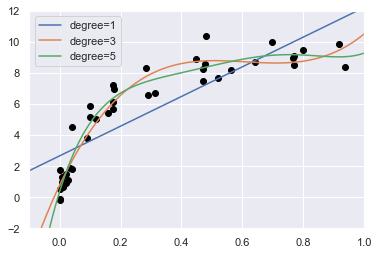

In [16]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

### Scikit-learn's Validation Curve Function

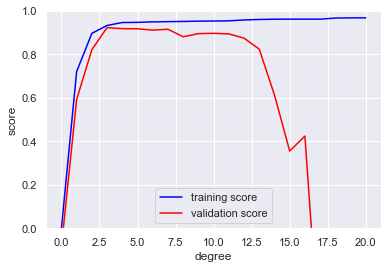

In [17]:
#N.B. VanderPlas is out of date, sklearn.learning_curve has been replaced with sklearn.model_selection
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## More Data Isn't Always Better

Unfortunately as the size of the training set increases, the validation curve tends to approach the training score curve. This yields **the learning curve**.

<center>
    <img src="learning-curve2.png" alt="Validation Curve" width="600" height="400">
</center>

## Returning to our Regression Example

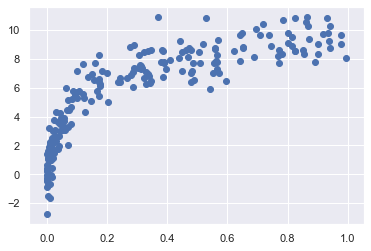

In [18]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

### More Data Means No Clear Model Winner

Notice that the validation and training curve are plotted with respect to model complexity (degree of the polynomial) there is no clear local maximum, like it had with just 40 points and a third degree polynomial.

Below the plot for 40 points is dashed, and the plot for 200 points is bold.

**Question: Is VanderPlas's example a good one? For this example, is a degree 3 polynomial somehow more correct than a degree 20 polynomial?**

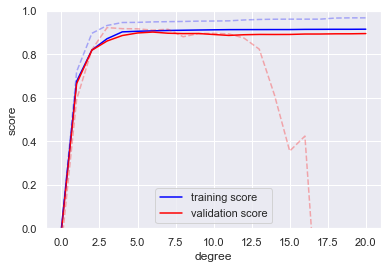

In [19]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
                                            'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## Cross-Validation and Holdout Sets

We already considered a practical example, on the MNIST data set, where setting the training set to be 100% of the available data gave the result that our predictions were right 100% of the time.

This is why we use **holdout sets**, which is built into the `train_test_split` function.

Let's run through the Iris Data set with KNN again as an example.

### First Example: The Wrong Way --- No Holdout Set

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X, y)
y_model = model.predict(X)

from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

### Using Train_Test_Split

Here we use a 50-50 split of the Iris data

In [26]:
from sklearn.model_selection import train_test_split #had to change VdP from cross_validation to model_selection
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

### Train on the Test and Test on the Train

In [27]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

### K-Fold Cross Validation

Luckily, there is a `cross_validation` function that automates this process.

The simplest form of cross validation uses what's called **$k$-fold cross validation.** Here you divide your training data into $k$ subsets of equal size.

- A model is trained using $k-1$ of the folds as training data

- the resulting model is validated on the one remaining fold

![Cross Validation](cross_validation.png)

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.86666667,
       1.        , 0.86666667, 1.        , 1.        , 1.        ])